[0]
98021992.44085638
Linear Regression Results:
X Coordinate - MSE: 5872875261717960.0000, R²: -0.0001
Y Coordinate - MSE: 5816131531918271.0000, R²: -0.0015
Z Coordinate - MSE: 20335547804373.1992, R²: 0.0000

Polynomial Regression (Degree 2) Results:
X Coordinate (Degree 2) - MSE: 5883379063665162.0000, R²: -0.0019
Y Coordinate (Degree 2) - MSE: 5816376821274637.0000, R²: -0.0016
Z Coordinate (Degree 2) - MSE: 20373458927816.0898, R²: -0.0018

Polynomial Regression (Degree 3) Results:
X Coordinate (Degree 3) - MSE: 5887725618994329.0000, R²: -0.0026
Y Coordinate (Degree 3) - MSE: 5814683948167163.0000, R²: -0.0013
Z Coordinate (Degree 3) - MSE: 20394923664944.4531, R²: -0.0029

Polynomial Regression (Degree 4) Results:
X Coordinate (Degree 4) - MSE: 5887584731069259.0000, R²: -0.0026
Y Coordinate (Degree 4) - MSE: 5815118718791018.0000, R²: -0.0014
Z Coordinate (Degree 4) - MSE: 20395542090277.8984, R²: -0.0029

Ridge Regression Results:
X Coordinate - MSE: 5872875261717960.0000, R²

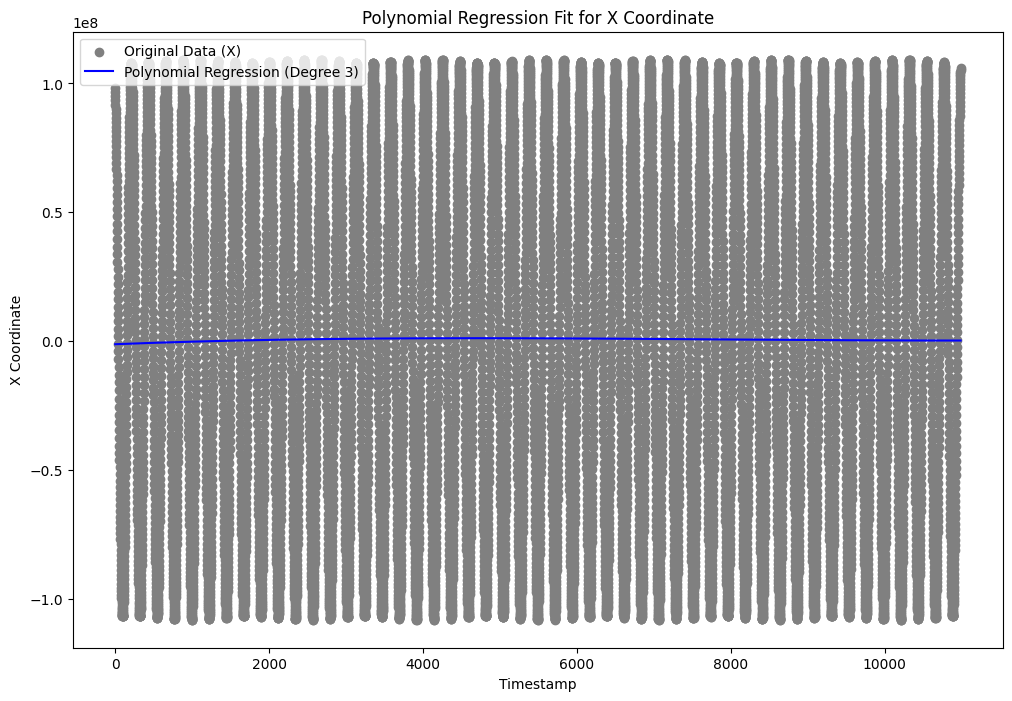

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load the cleaned data
data = pd.read_csv("RawData/horizons_results_30_years.csv")

# Separate features and target variables
# X = data['Date'].values.reshape(-1, 1)  # Feature
date = pd.to_datetime(data['Date'].values)
# X = pd.DataFrame({
#     'year': date.year,
#     'month': date.month,
#     'day': date.day
# })
# X = X[['year', 'month', 'day']].to_numpy()
reference_date = date.min()
days_since_reference = (date - reference_date).days
data['days_since_reference'] = days_since_reference
X = data['days_since_reference'].values.reshape(-1, 1)  # reshape for sklearn

# X = X.to_numpy()

print(X[0])

Y_x = data['Position_x'].values.astype('float')  # Target for x-coordinate
Y_y = data['Position_y'].values.astype('float')  # Target for y-coordinate
Y_z = data['Position_z'].values.astype('float')  # Target for z-coordinate

print(Y_x[0])

# Split data into training and testing sets
X_train, X_test, Yx_train, Yx_test = train_test_split(X, Y_x, test_size=0.2, random_state=0)
_, _, Yy_train, Yy_test = train_test_split(X, Y_y, test_size=0.2, random_state=0)
_, _, Yz_train, Yz_test = train_test_split(X, Y_z, test_size=0.2, random_state=0)

# Function to fit and evaluate a model
def evaluate_model(model, X_train, X_test, Y_train, Y_test, coordinate_name):
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(Y_test, predictions)
    r2 = r2_score(Y_test, predictions)
    print(f"{coordinate_name} - MSE: {mse:.4f}, R²: {r2:.4f}")
    return mse, r2, predictions

# Linear Regression
print("Linear Regression Results:")
lin_reg = LinearRegression()
evaluate_model(lin_reg, X_train, X_test, Yx_train, Yx_test, "X Coordinate")
evaluate_model(lin_reg, X_train, X_test, Yy_train, Yy_test, "Y Coordinate")
evaluate_model(lin_reg, X_train, X_test, Yz_train, Yz_test, "Z Coordinate")

# Polynomial Regression for Degrees 2, 3, and 4
for degree in [2, 3, 4]:
    print(f"\nPolynomial Regression (Degree {degree}) Results:")
    poly = PolynomialFeatures(degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    poly_reg = LinearRegression()
    evaluate_model(poly_reg, X_poly_train, X_poly_test, Yx_train, Yx_test, f"X Coordinate (Degree {degree})")
    evaluate_model(poly_reg, X_poly_train, X_poly_test, Yy_train, Yy_test, f"Y Coordinate (Degree {degree})")
    evaluate_model(poly_reg, X_poly_train, X_poly_test, Yz_train, Yz_test, f"Z Coordinate (Degree {degree})")

# Ridge Regression
print("\nRidge Regression Results:")
ridge = Ridge(alpha=1.0)
evaluate_model(ridge, X_train, X_test, Yx_train, Yx_test, "X Coordinate")
evaluate_model(ridge, X_train, X_test, Yy_train, Yy_test, "Y Coordinate")
evaluate_model(ridge, X_train, X_test, Yz_train, Yz_test, "Z Coordinate")

# Lasso Regression
print("\nLasso Regression Results:")
lasso = Lasso(alpha=0.1)
evaluate_model(lasso, X_train, X_test, Yx_train, Yx_test, "X Coordinate")
evaluate_model(lasso, X_train, X_test, Yy_train, Yy_test, "Y Coordinate")
evaluate_model(lasso, X_train, X_test, Yz_train, Yz_test, "Z Coordinate")

# Optional: Plotting the results for visualization
plt.figure(figsize=(12, 8))

# Plot for X Coordinate with Polynomial Regression of best-performing degree (Example: Degree 3)
poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(X)
best_poly_model = LinearRegression()
best_poly_model.fit(X_poly, Y_x)
Y_x_poly_pred = best_poly_model.predict(X_poly)

plt.scatter(X, Y_x, color='gray', label='Original Data (X)')
plt.plot(X, Y_x_poly_pred, color='blue', label='Polynomial Regression (Degree 3)')
plt.xlabel("Timestamp")
plt.ylabel("X Coordinate")
plt.legend()
plt.title("Polynomial Regression Fit for X Coordinate")
plt.show()


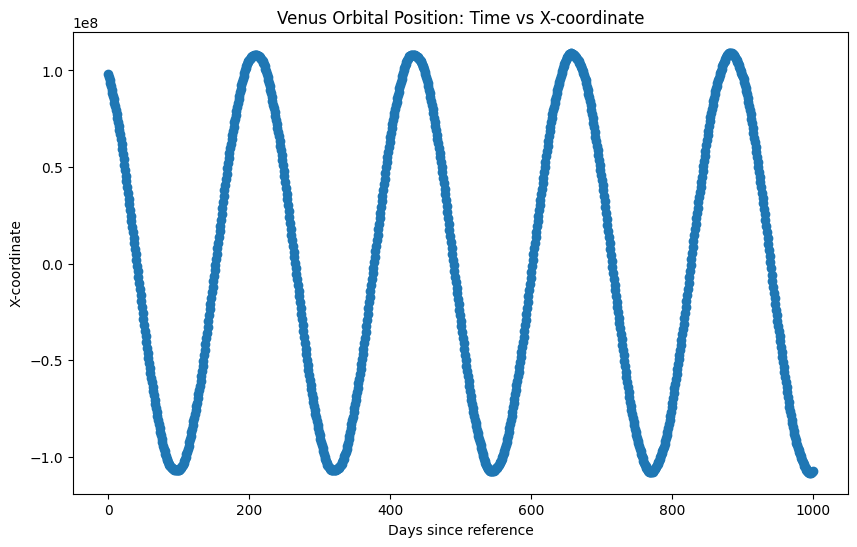

In [30]:
#Visulaize the data
plt.figure(figsize=(10, 6))
plt.scatter(X[0 : 1000], Y_x[0 : 1000])
plt.xlabel('Days since reference')
plt.ylabel('X-coordinate')
plt.title('Venus Orbital Position: Time vs X-coordinate')
plt.show()

In [37]:
def add_trigonometric_features(X, period):
    return np.column_stack((X, 
                            np.sin(2 * np.pi * X / period), 
                            np.cos(2 * np.pi * X / period)))

# Assuming the period is 365.25 days (Venus year)
X_trig = add_trigonometric_features(X, 225)

model = LinearRegression()
model.fit(X_trig, Y_x)

y_pred = model.predict(X_trig)

mse = mean_squared_error(Y_x, y_pred)
r2 = r2_score(Y_x, y_pred)

print("Trigonometric Model:")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")

Trigonometric Model:
MSE: 81629744671777.4
R-squared: 0.9859836896139432


In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime

def preprocess_data(df):
    """
    Preprocess the orbital data for model training
    """
    # Convert string values to float
    for col in ['Position_x', 'Position_y', 'Position_z', 
                'Velocity_x', 'Velocity_y', 'Velocity_z']:
        df[col] = df[col].astype(float)
    
    # Convert date strings to numerical features
    df['Date'] = pd.to_datetime(df['Date'])
    df['day_of_year'] = df['Date'].dt.dayofyear
    df['year'] = df['Date'].dt.year
    
    # Create cyclical features for day of year
    df['day_sin'] = np.sin(2 * np.pi * df['day_of_year']/365)
    df['day_cos'] = np.cos(2 * np.pi * df['day_of_year']/365)
    
    return df

def create_features(df):
    """
    Create feature matrix for the model
    """
    # Use velocities, cyclical time features, and year as predictors
    features = ['Velocity_x', 'Velocity_y', 'Velocity_z',
                'day_sin', 'day_cos', 'year']
    
    return df[features]

def train_position_models(df):
    """
    Train separate models for x, y, and z coordinates
    """
    # Preprocess data
    df_processed = preprocess_data(df)
    
    # Create feature matrix
    X = create_features(df_processed)
    
    # Create target variables
    y_x = df_processed['Position_x']
    y_y = df_processed['Position_y']
    y_z = df_processed['Position_z']
    
    # Split data
    X_train, X_test, y_x_train, y_x_test = train_test_split(X, y_x, test_size=0.2, random_state=42)
    _, _, y_y_train, y_y_test = train_test_split(X, y_y, test_size=0.2, random_state=42)
    _, _, y_z_train, y_z_test = train_test_split(X, y_z, test_size=0.2, random_state=42)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train models
    models = {}
    scores = {}
    
    for coord, y_train, y_test in [('x', y_x_train, y_x_test),
                                  ('y', y_y_train, y_y_test),
                                  ('z', y_z_train, y_z_test)]:
        model = LinearRegression()
        model.fit(X_train_scaled, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test_scaled)
        
        # Calculate metrics
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        
        models[f'model_{coord}'] = model
        scores[f'scores_{coord}'] = {'r2': r2, 'rmse': rmse}
    
    return models, scores, scaler

def predict_position(models, scaler, date, velocities):
    """
    Predict position given a date and velocities
    """
    # Create features for prediction
    date = pd.to_datetime(date)
    day_of_year = date.dayofyear
    
    features = np.array([[
        velocities['x'],
        velocities['y'],
        velocities['z'],
        np.sin(2 * np.pi * day_of_year/365),
        np.cos(2 * np.pi * day_of_year/365),
        date.year
    ]])
    
    # Scale features
    features_scaled = scaler.transform(features)
    
    # Make predictions
    predictions = {
        'x': models['model_x'].predict(features_scaled)[0],
        'y': models['model_y'].predict(features_scaled)[0],
        'z': models['model_z'].predict(features_scaled)[0]
    }
    
    return predictions

In [39]:
models, scores, scaler = train_position_models(data)

# Print model performance
for coord in ['x', 'y', 'z']:
    print(f"\nPosition {coord.upper()} metrics:")
    print(f"R² score: {scores[f'scores_{coord}']['r2']:.4f}")
    print(f"RMSE: {scores[f'scores_{coord}']['rmse']:.4f}")


Position X metrics:
R² score: 0.9977
RMSE: 3736383.8124

Position Y metrics:
R² score: 0.9998
RMSE: 1034527.3012

Position Z metrics:
R² score: 0.9982
RMSE: 196309.3807


In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from datetime import datetime

def preprocess_data(df):
    """
    Preprocess the orbital data for model training
    """
    # Convert string values to float
    for col in ['Position_x', 'Position_y', 'Position_z', 
                'Velocity_x', 'Velocity_y', 'Velocity_z']:
        df[col] = df[col].astype(float)
    
    # Convert date strings to numerical features
    df['Date'] = pd.to_datetime(df['Date'])
    df['day_of_year'] = df['Date'].dt.dayofyear
    df['year'] = df['Date'].dt.year
    
    # Create cyclical features for day of year
    df['day_sin'] = np.sin(2 * np.pi * df['day_of_year']/365)
    df['day_cos'] = np.cos(2 * np.pi * df['day_of_year']/365)
    
    # Add derived features
    df['velocity_magnitude'] = np.sqrt(df['Velocity_x']**2 + 
                                     df['Velocity_y']**2 + 
                                     df['Velocity_z']**2)
    
    # Add interaction terms
    df['vel_xy'] = df['Velocity_x'] * df['Velocity_y']
    df['vel_xz'] = df['Velocity_x'] * df['Velocity_z']
    df['vel_yz'] = df['Velocity_y'] * df['Velocity_z']
    
    return df

def create_features(df):
    """
    Create feature matrix for the model
    """
    features = [
        'Velocity_x', 'Velocity_y', 'Velocity_z',
        'velocity_magnitude', 'vel_xy', 'vel_xz', 'vel_yz',
        'day_sin', 'day_cos', 'year'
    ]
    
    return df[features]

def evaluate_model(model, X, y, model_name):
    """
    Evaluate model using cross-validation
    """
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    return {
        'mean_r2': cv_scores.mean(),
        'std_r2': cv_scores.std(),
        'model_name': model_name
    }

def train_position_models(df):
    """
    Train multiple models for each coordinate and compare their performance
    """
    # Preprocess data
    df_processed = preprocess_data(df)
    
    # Create feature matrix
    X = create_features(df_processed)
    
    # Create target variables
    targets = {
        'x': df_processed['Position_x'],
        'y': df_processed['Position_y'],
        'z': df_processed['Position_z']
    }
    
    # Initialize models
    models = {
        'linear': LinearRegression(),
        'rf': RandomForestRegressor(n_estimators=100, random_state=42),
        'xgb': xgb.XGBRegressor(random_state=42)
    }
    
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Store results
    results = {}
    best_models = {}
    
    # Train and evaluate models for each coordinate
    for coord, y in targets.items():
        coord_results = []
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X_scaled, y, test_size=0.2, random_state=42
        )
        
        # Train and evaluate each model type
        for model_name, model in models.items():
            # Train model
            model.fit(X_train, y_train)
            
            # Make predictions
            y_pred = model.predict(X_test)
            
            # Calculate metrics
            r2 = r2_score(y_test, y_pred)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            
            # Cross-validation
            cv_results = evaluate_model(model, X_scaled, y, model_name)
            
            result = {
                'model_name': model_name,
                'r2': r2,
                'rmse': rmse,
                'cv_r2_mean': cv_results['mean_r2'],
                'cv_r2_std': cv_results['std_r2'],
                'model': model
            }
            
            coord_results.append(result)
        
        # Find best model for this coordinate
        best_model = max(coord_results, key=lambda x: x['cv_r2_mean'])
        best_models[coord] = best_model['model']
        results[coord] = coord_results
    
    return best_models, results, scaler

def predict_position(models, scaler, date, velocities):
    """
    Predict position using the best models
    """
    # Create features for prediction
    date = pd.to_datetime(date)
    day_of_year = date.dayofyear
    
    # Calculate derived features
    vel_magnitude = np.sqrt(velocities['x']**2 + velocities['y']**2 + velocities['z']**2)
    vel_xy = velocities['x'] * velocities['y']
    vel_xz = velocities['x'] * velocities['z']
    vel_yz = velocities['y'] * velocities['z']
    
    features = np.array([[
        velocities['x'],
        velocities['y'],
        velocities['z'],
        vel_magnitude,
        vel_xy,
        vel_xz,
        vel_yz,
        np.sin(2 * np.pi * day_of_year/365),
        np.cos(2 * np.pi * day_of_year/365),
        date.year
    ]])
    
    # Scale features
    features_scaled = scaler.transform(features)
    
    # Make predictions using best models
    predictions = {
        'x': models['x'].predict(features_scaled)[0],
        'y': models['y'].predict(features_scaled)[0],
        'z': models['z'].predict(features_scaled)[0]
    }
    
    return predictions

def print_model_comparison(results):
    """
    Print detailed model comparison
    """
    for coord in results.keys():
        print(f"\nResults for {coord.upper()} coordinate:")
        print("-" * 50)
        print(f"{'Model':<12} {'R²':<10} {'RMSE':<12} {'CV R² (mean)':<15} {'CV R² (std)':<10}")
        print("-" * 50)
        
        for result in results[coord]:
            print(f"{result['model_name']:<12} "
                  f"{result['r2']:<10.4f} "
                  f"{result['rmse']:<12.4f} "
                  f"{result['cv_r2_mean']:<15.4f} "
                  f"{result['cv_r2_std']:<10.4f}")

In [45]:
best_models, results, scaler = train_position_models(data)

# Print detailed comparison of all models
print_model_comparison(results)


Results for X coordinate:
--------------------------------------------------
Model        R²         RMSE         CV R² (mean)    CV R² (std)
--------------------------------------------------
linear       0.9977     3728277.4606 0.9976          0.0000    
rf           0.9991     2259546.5422 0.9990          0.0001    
xgb          0.9996     1462730.1249 0.9994          0.0002    

Results for Y coordinate:
--------------------------------------------------
Model        R²         RMSE         CV R² (mean)    CV R² (std)
--------------------------------------------------
linear       0.9998     1005039.4929 0.9998          0.0000    
rf           0.9997     1216623.7979 0.9997          0.0000    
xgb          0.9998     1042499.6522 0.9998          0.0000    

Results for Z coordinate:
--------------------------------------------------
Model        R²         RMSE         CV R² (mean)    CV R² (std)
--------------------------------------------------
linear       0.9982     195803.017

In [46]:
date = '2024-01-01'
velocities = {
    'x': 20.5,
    'y': -15.3,
    'z': 5.2
}

predicted_position = predict_position(best_models, scaler, date, velocities)
print("\nPredicted position:", predicted_position)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Predicted position: {'x': np.float32(4459964.5), 'y': np.float64(2478083.8920870284), 'z': np.float32(4459964.5)}
